# Earthquakes in Indonesia - Part 2

## Load dataset

In [4]:
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/nathakusuma/stp-data-gempa/main/katalog_gempa.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,tgl,ot,lat,lon,depth,mag,remark,strike1,dip1,rake1,strike2,dip2,rake2
0,2008/11/01,21:02:43.058,-9.18,119.06,10,4.9,Sumba Region - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
1,2008/11/01,20:58:50.248,-6.55,129.64,10,4.6,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN
2,2008/11/01,17:43:12.941,-7.01,106.63,121,3.7,Java - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
3,2008/11/01,16:24:14.755,-3.30,127.85,10,3.2,Seram - Indonesia,NaN,NaN,NaN,NaN,NaN,NaN
4,2008/11/01,16:20:37.327,-6.41,129.54,70,4.3,Banda Sea,NaN,NaN,NaN,NaN,NaN,NaN


Dataset ini mencatat informasi tentang gempa bumi. Berikut beberapa kolom yang tersedia:

- `tgl`: Tanggal gempa
- `ot`: Waktu kejadian
- `lat`: Lintang
- `lon`: Bujur
- `depth`: Kedalaman
- `mag`: Magnitudo
- `remark`: Keterangan lokasi
- `strike1`, `dip1`, `rake1`, `strike2`, `dip2`, `rake2`: Informasi tentang mekanisme sumber gempa (banyak nilai NaN).

## Variabel Acak Kontinu

### Distribusi Probabilitas Variabel Acak Kontinu

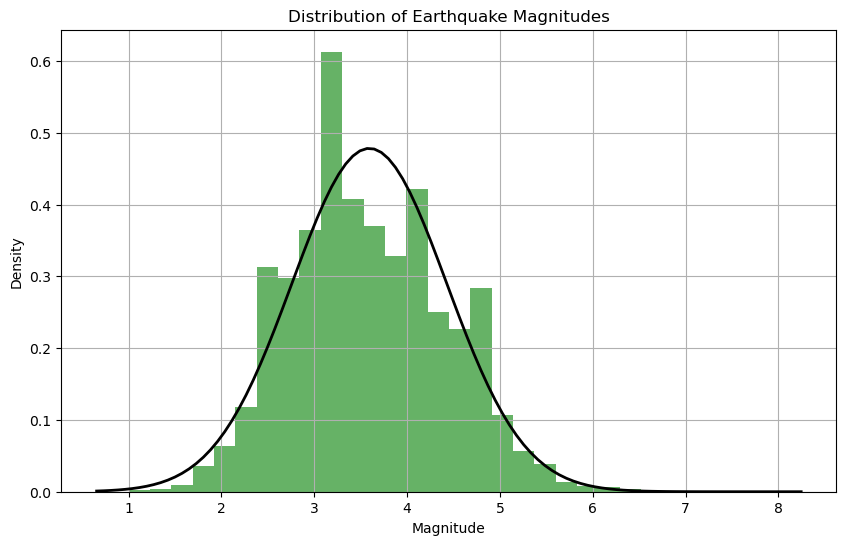

In [11]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Filter data to include only rows with valid magnitudes
katalog_gempa = data[data['mag'].notna()]

# Extract magnitudes
magnitudes = katalog_gempa['mag']

# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(magnitudes, bins=30, density=True, alpha=0.6, color='g')

# Plot probability density function (PDF)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, magnitudes.mean(), magnitudes.std())
plt.plot(x, p, 'k', linewidth=2)
title = "Distribution of Earthquake Magnitudes"
plt.title(title)
plt.xlabel('Magnitude')
plt.ylabel('Density')
plt.grid(True)
plt.show()

Dari analisis di atas, kita dapat melihat **Probability Density Function (PDF)**: Garis hitam di histogram adalah fungsi densitas probabilitas (PDF) yang diperkirakan menggunakan distribusi normal. Ini menunjukkan sebaran teoritis dari magnitudo gempa.

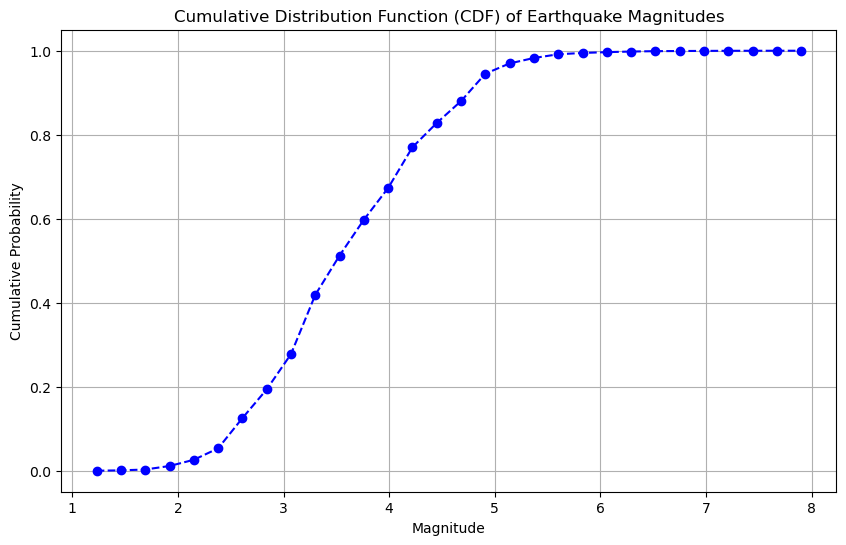

In [10]:
# Plot Cumulative Distribution Function (CDF)
plt.figure(figsize=(10, 6))
counts, bin_edges = np.histogram(magnitudes, bins=30, density=True)
cdf = np.cumsum(counts) / np.sum(counts)
plt.plot(bin_edges[1:], cdf, linestyle='--', marker='o', color='b')

# Add labels and title
plt.title('Cumulative Distribution Function (CDF) of Earthquake Magnitudes')
plt.xlabel('Magnitude')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.show()

Grafik di atas menunjukkan Cumulative Distribution Function (CDF) dari magnitudo gempa bumi. CDF memberikan informasi tentang probabilitas kumulatif bahwa magnitudo gempa bumi akan lebih kecil atau sama dengan nilai tertentu.

Dari grafik ini, kita bisa melihat bahwa:

1. **Bentuk Kurva**: Kurva CDF meningkat seiring bertambahnya magnitudo, yang menunjukkan bahwa probabilitas kumulatif meningkat.
2. **Interpretasi Nilai CDF**:
    Misalnya, pada magnitudo sekitar 4.0, CDF mendekati 0.8. Ini berarti sekitar 80% gempa bumi yang tercatat memiliki magnitudo kurang dari atau sama dengan 4.0.


### Distribusi Peluang Gabungan Kontinu

In [12]:
# Memeriksa apakah ada nilai yang hilang atau tidak valid
data[['depth', 'mag']].describe()

,depth,mag
count,92887.000000,92887.000000
mean,49.009399,3.592788
std,76.761070,0.834042
min,2.000000,1.000000
25%,10.000000,3.000000
50%,16.000000,3.500000
75%,54.000000,4.200000
max,750.000000,7.900000


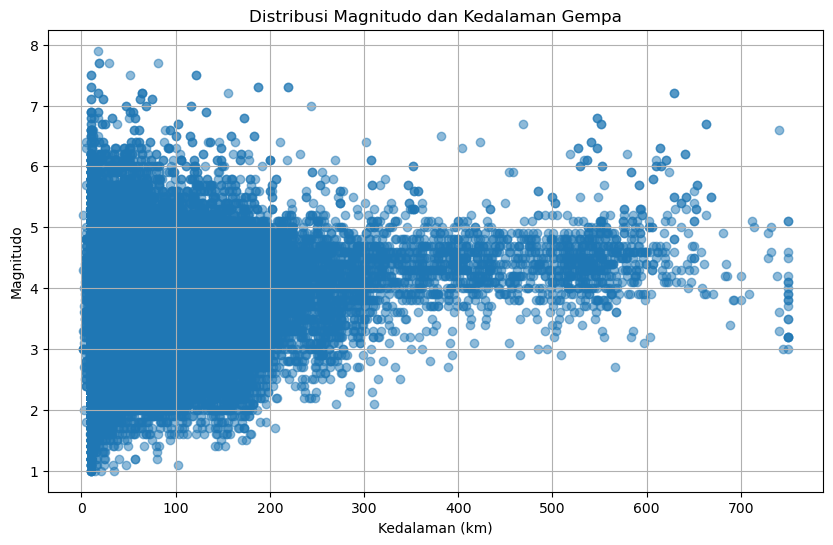

In [13]:
import matplotlib.pyplot as plt

# Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['depth'], data['mag'], alpha=0.5)
plt.title('Distribusi Magnitudo dan Kedalaman Gempa')
plt.xlabel('Kedalaman (km)')
plt.ylabel('Magnitudo')
plt.grid(True)
plt.show()

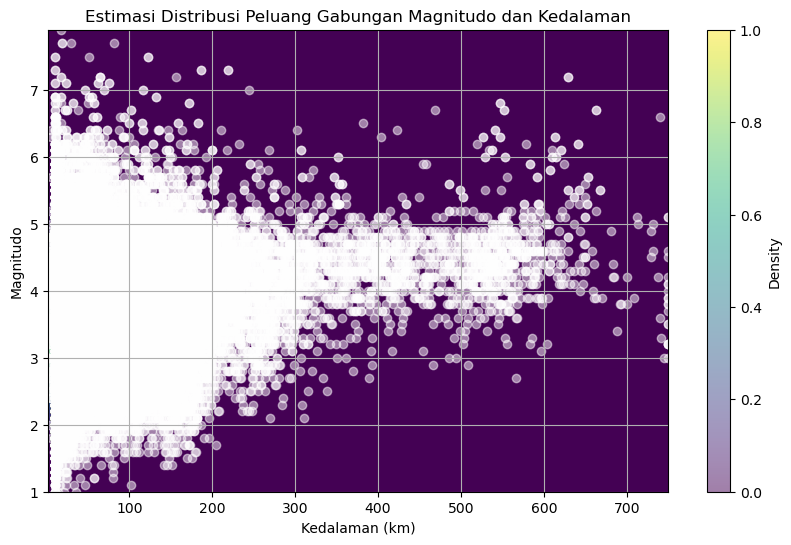

In [14]:
from scipy.stats import gaussian_kde
import numpy as np

# Mengambil data magnitudo dan kedalaman
depth = data['depth'].dropna()
mag = data['mag'].dropna()

# Menggabungkan data menjadi array dua dimensi
values = np.vstack([depth, mag])
kde = gaussian_kde(values)

# Membuat grid untuk estimasi KDE
x_grid, y_grid = np.meshgrid(np.linspace(depth.min(), depth.max(), 100), np.linspace(mag.min(), mag.max(), 100))
grid_coords = np.vstack([x_grid.ravel(), y_grid.ravel()])
z = kde(grid_coords).reshape(x_grid.shape)

# Plot hasil KDE
plt.figure(figsize=(10, 6))
plt.imshow(z, origin='lower', aspect='auto', extent=[depth.min(), depth.max(), mag.min(), mag.max()], cmap='viridis')
plt.scatter(depth, mag, alpha=0.5, color='white')
plt.title('Estimasi Distribusi Peluang Gabungan Magnitudo dan Kedalaman')
plt.xlabel('Kedalaman (km)')
plt.ylabel('Magnitudo')
plt.colorbar(label='Density')
plt.grid(True)
plt.show()

Berikut adalah hasil analisis distribusi peluang gabungan kontinu untuk magnitudo dan kedalaman gempa. Visualisasi menunjukkan:

1. **Scatter Plot**: Menunjukkan distribusi data gempa berdasarkan kedalaman dan magnitudo. Tampak beberapa konsentrasi data pada kedalaman tertentu, khususnya pada kedalaman dangkal dan sedang.
2. **Kernel Density Estimation (KDE)**: Menunjukkan estimasi distribusi peluang gabungan dari magnitudo dan kedalaman. Area dengan warna lebih gelap menunjukkan kepadatan data yang lebih tinggi, yang berarti kejadian gempa lebih sering terjadi pada kombinasi magnitudo dan kedalaman tersebut.


### Distribusi Peluang Bersama Marginal

Distribusi peluang bersama marginal adalah konsep dalam statistik yang digunakan untuk memahami probabilitas dua variabel acak secara bersamaan dan masing-masing secara terpisah. Dalam konteks data gempa bumi ini, kita bisa mengeksplorasi distribusi bersama antara magnitudo gempa (mag) dan kedalaman gempa (depth).

#### 1. Distribusi Bersama
Distribusi bersama menggambarkan probabilitas dari kombinasi nilai-nilai antara dua variabel acak. Untuk ini, kita bisa membuat tabel frekuensi bersama dari `mag` dan `depth`.

#### 2. Distribusi Marginal
Distribusi marginal adalah distribusi dari satu variabel acak yang diperoleh dengan menjumlahkan atau mengintegrasikan distribusi bersama atas nilai-nilai dari variabel lainnya.


In [21]:
# Mengelompokkan data kedalaman gempa untuk memudahkan analisis
bins_depth = [0, 30, 60, 90, 120, 150, 200, 300, 500, 700]
labels_depth = ['0-30', '30-60', '60-90', '90-120', '120-150', '150-200', '200-300', '300-500', '500-700']
data['depth_group'] = pd.cut(data['depth'], bins=bins_depth, labels=labels_depth, right=False)

# Mengelompokkan data magnitudo gempa
bins_mag = [0, 3, 4, 5, 6, 7, 8, 9]
labels_mag = ['<3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9']
data['mag_group'] = pd.cut(data['mag'], bins=bins_mag, labels=labels_mag, right=False)

# Membuat tabel frekuensi bersama
joint_distribution = pd.crosstab(data['depth_group'], data['mag_group'])

# Menghitung distribusi marginal
marginal_depth = joint_distribution.sum(axis=1)
marginal_mag = joint_distribution.sum(axis=0)

# Menampilkan hasil
display(joint_distribution)
display(marginal_depth)
display(marginal_mag)


mag_group,<3,3-4,4-5,5-6,6-7,7-8
depth_group,,,,,,
0-30,16604,29044,13111,1755,130,14
30-60,1978,4063,3229,1178,88,3
60-90,1113,2282,1766,625,37,10
90-120,808,1714,1562,352,28,2
120-150,604,1252,1493,260,19,2
150-200,553,1452,1892,231,16,3
200-300,102,726,1073,103,7,3
300-500,11,160,698,83,9,0
500-700,2,70,421,78,32,2


depth_group
0-30       60658
30-60      10539
60-90       5833
90-120      4466
120-150     3630
150-200     4147
200-300     2014
300-500      961
500-700      605
dtype: int64

mag_group
<3     21775
3-4    40763
4-5    25245
5-6     4665
6-7      366
7-8       39
dtype: int64